[1] "all_features_reshuffle_importance.tsv"
[1] "clin_demo_comp_reshuffle_importance.tsv"
[1] "clin_demo_cyto_gen_comp_reshuffle_importance.tsv"
[1] "clin_demo_cyto_gen_reshuffle_importance.tsv"
[1] "clin_demo_cyto_gen_without_age_reshuffle_importance.tsv"
[1] "clin_demo_cyto_reshuffle_importance.tsv"
[1] "clin_demo_cyto_without_age_reshuffle_importance.tsv"
[1] "clin_demo_gen_without_age_reshuffle_importance.tsv"
[1] "clin_demo_without_age_reshuffle_importance.tsv"
[1] "comp_reshuffle_importance.tsv"
[1] "cyto_comp_reshuffle_importance.tsv"
[1] "cyto_gen_comp_reshuffle_importance.tsv"
[1] "demo_cyto_without_age_reshuffle_importance.tsv"
[1] "demo_gen_without_age_reshuffle_importance.tsv"
[1] "eln_age_reshuffle_importance.tsv"
[1] "eln_clin_demo_comp_reshuffle_importance.tsv"
[1] "eln_clin_demo_comp_without_age_reshuffle_importance.tsv"
[1] "eln_clin_demo_cyto_gen_reshuffle_importance.tsv"
[1] "eln_clin_demo_cyto_gen_without_age_reshuffle_importance.tsv"
[1] "eln_clin_demo_cyto_reshuff

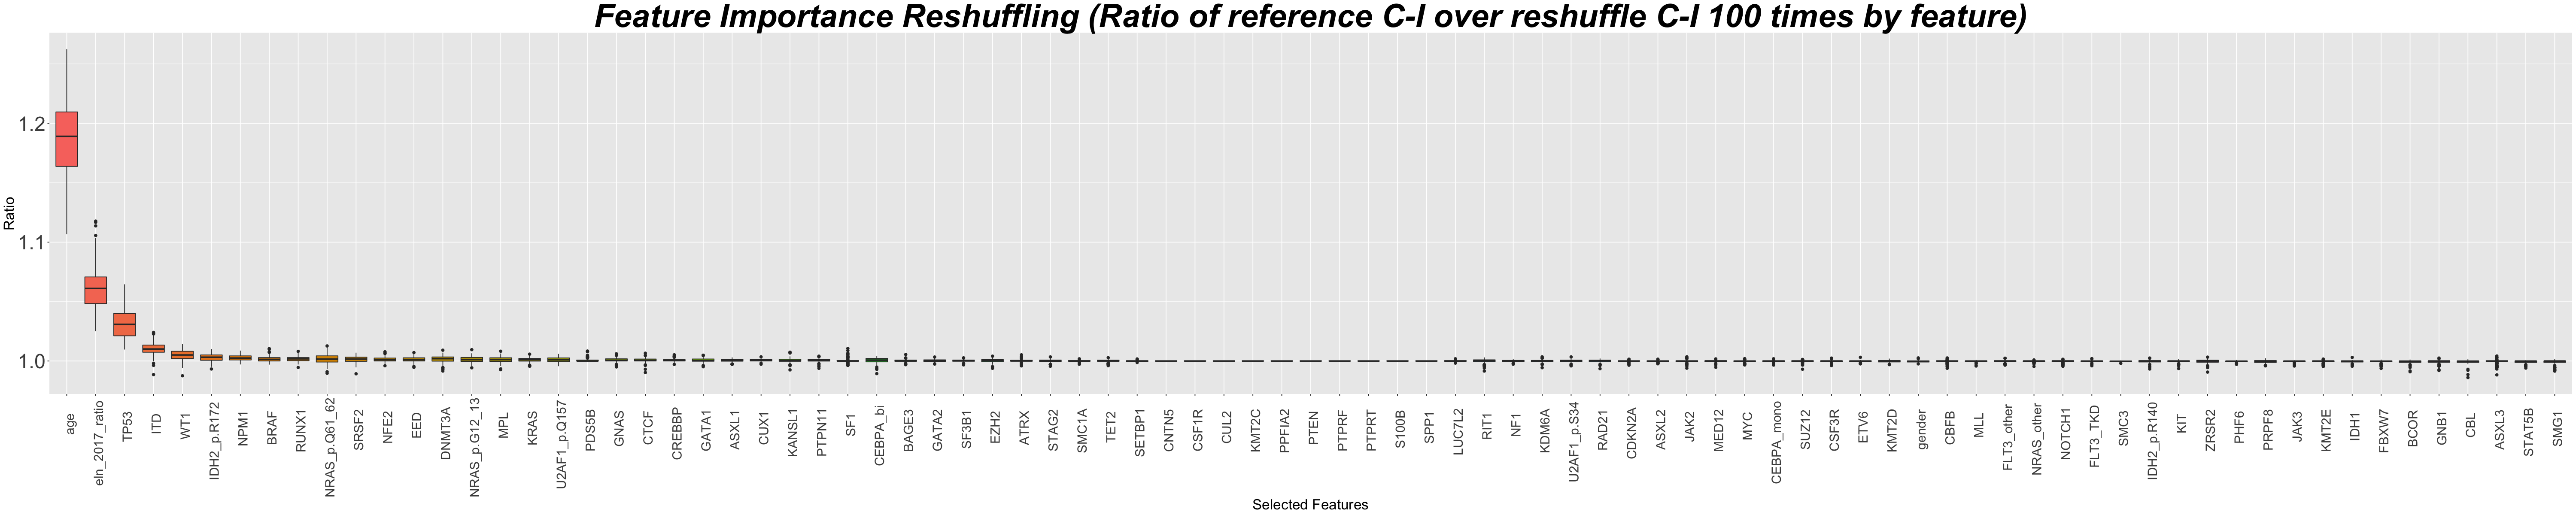

In [5]:
for (l in list.files()){
    print(l)
}
df <- read.table("eln_demo_gen_reshuffle_importance.tsv")
df <- df[df$algo=="Cox",]
df$Ratio <- df$ref_CI/df$permuted_CI
library(ggplot2)
source("../../../../src/tools.R")
set_notebook_plot_size(50,10)
ggplot(df,aes(x=reorder(feature,-Ratio,mean),y=Ratio)) + geom_boxplot(aes(fill = reorder(feature,-Ratio,mean)), notch=F)+theme(plot.title = element_text( size=45, face="bold.italic",hjust=0.5),legend.position="none",axis.text.x = element_text(angle = 90, hjust = 0.8,vjust=0.8,size=18),axis.text.y=element_text(size=28),axis.title.y = element_text(size = 20),axis.title.x = element_text(size = 20))+xlab("Selected Features") +
ggtitle("Feature Importance Reshuffling (Ratio of reference C-I over reshuffle C-I 100 times by feature)")

In [62]:
head(df)

feature,ref_CI,permuted_CI,algo,model,Ratio
eln_2017_ratio,0.7123213,0.6912254,Lasso,eln_clin_demo_comp,1.030520
eln_2017_ratio,0.7123213,0.6813308,Lasso,eln_clin_demo_comp,1.045485
eln_2017_ratio,0.7123213,0.6720894,Lasso,eln_clin_demo_comp,1.059861
eln_2017_ratio,0.7123213,0.6939819,Lasso,eln_clin_demo_comp,1.026426
ahd,0.7123213,0.7116521,Lasso,eln_clin_demo_comp,1.000940
ahd,0.7123213,0.7078281,Lasso,eln_clin_demo_comp,1.006348


In [54]:
library(glmnet)
library(doMC)
library(survival)
library(data.table)
library(mltools)
library(CoxBoost)
library(randomForestSRC)
library(CoxHD)
source('../../InitialPrognosis/run_prognosis.R')
source("../../Feature_Importance_Reshuffle/feature_importance.R")

##---------------------------------------------------------------------------------MODELS TO TRY

all_features <-c(1:180) 
clin_demo_comp <-c(155:180) 
clin_demo_cyto_gen_comp <- c(2:180) 
comp <- c(164:180) 
cyto_comp <-c(86:154,164:180) 
cyto_gen_comp <- c(2:154,164:180) 
eln_clin_demo_comp <- c(1,155:180) 
eln_cyto_comp <- c(1,86:154,164:180) 
eln_cyto_gen_comp <- c(1:154,164:180) 
eln_gen_comp <- c(1:85,164:180) 
gen_comp <- c(2:85,164:180) 
clin_comp <- c(155:161,164:180) 
clin_cyto_comp <- c(86:161,164:180) 
clin_gen_comp <- c(2:85,155:161,164:180) 
eln_clin_comp <- c(1,155:161,164:180) 

#Without age
all_features_without_age <-c(1:162,164:180) 
clin_demo_comp_without_age <-c(155:162,164:180) 
clin_demo_cyto_gen_comp_without_age <- c(2:162,164:180) 
eln_clin_demo_comp_without_age <- c(1,155:162,164:180) 




###With age:
eln_clin_gen <-  c(1:85,155:161)
eln_demo_gen <- c(1:85,162:163)
eln_clin_demo_cyto_gen <- c(1:163)
eln_clin_demo_cyto <- c(1,86:163)

eln_clin_demo_gen <- c(1:85,155:163)  
eln_clin_demo <- c(1,155:163)
eln_clin <- c(1,155:161)
eln_cyto_gen <- c(1:154)
clin_demo_cyto_gen <- c(2:163)
clin_demo_cyto <- c(86:163)
clin_demo_gen <- c(2:85,155:163)
clin_demo <- c(155:163)
cyto_gen <- c(2:154)
cyto <- c(86:154)
gen <- c(2:85)
clin_gen <- c(2:85,155:161)
clin_cyto <- c(86:161)
demo_gen <- c(2:85,162:163)
demo_cyto <- c(86:154,162:163)   

###Without age:
eln_demo_gen_without_age <- c(1:85,162)
eln_clin_demo_cyto_gen_without_age <- c(1:162)
eln_clin_demo_cyto_without_age <- c(1,86:162)
eln_clin_demo_gen_without_age <- c(1:85,155:162)
eln_clin_demo_without_age <- c(1,155:162)
clin_demo_cyto_gen_without_age <- c(2:162)
clin_demo_cyto_without_age <- c(86:162)
clin_demo_gen_without_age <- c(2:85,155:162)
clin_demo_without_age <- c(155:162)
demo_gen_without_age <- c(2:85,162)
demo_cyto_without_age <- c(86:154,162)   
gen_age <- c(2:85,163)

eln_comp <-c(1,164:180)
eln_age <- c(1,163)
eln_gen <- c(1:85)
eln_cyto <- c(1,86:154)

##---------------------------------------------------------------------------------PREPARING MODELS and ALGOS
df_final <- read.table("../../Feature_Importance_Reshuffle/prognosis_comp_final.tsv",sep='\t',header=T)

prognosis_features<- list(eln_clin_comp=eln_clin_comp)



                         
 

### PARAMETERS OF ANALYSIS:
nrepeats=1
seed=1234
mc.cores=1
npermutations=2
nfolds=2

algorithms<-c(algo_Lasso, algo_Ridge, algo_Elastic_net,  algo_RFX, algo_RFS, algo_Cox)
predictors<-c(predictor_Lasso, predictor_Ridge, predictor_Elastic_net,  predictor_RFX, predictor_RFS,  predictor_Cox)
algo_names<-c('Lasso','Ridge','Elastic_net','RFX','RFS','Cox')
#algorithms<-c(algo_Cox)
#predictors<-c(predictor_Cox)
#algo_names<-c('Cox')

response <- data.matrix(df_final[,c("os","os_status")])
colnames(response) <- c("time","status")



##---------------------------------------------------------------------------------PREPARING MODELS and ALGOS

for (j in 1:length(prognosis_features)){
    res_data <- data.frame('feature'=character(),'ref_CI'=numeric(),'permuted_CI'=numeric(),'algo'=character(),'model'=character())
    #print(names(prognosis_features[j]))
    for(i in 1:length(algorithms)){
        design <- data.matrix(data.frame(df_final[,prognosis_features[[j]]]))                
        tmp <- runCV_CI_with_test(response=response, design=design,
              nfolds=nfolds, nrepeats=nrepeats, seed=seed, mc.cores=mc.cores, features=colnames(design), npermutations=npermutations, 
                                  algorithm=algorithms[i][[1]], predictor=predictors[i][[1]])
        print(algo_names[i])
        tmp$algo<-algo_names[i]
        tmp$model <- names(prognosis_features[j])
        res_data <- rbind(res_data,tmp)
    }
    #write.table(res_data,paste(names(prognosis_features)[j],".tsv",sep="_reshuffle_importance"),quote=F,sep='\t')
}

[1] "start CV"
.

Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Dep

.

Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Dep

[1] "Lasso"
[1] "start CV"
.

Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Dep

.

Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Dep

[1] "Ridge"
[1] "start CV"
.

Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Dep

.

Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Dep

[1] "Elastic_net"
[1] "start CV"
.

Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Dep

.

Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Dep

[1] "RFX"
[1] "start CV"
.

Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Dep

.

Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Dep

[1] "RFS"
[1] "start CV"
.

Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Dep

.

Warning message in fitter(X, Y, strats, offset, init, control, weights = weights, :
“Loglik converged before variable  24 ; coefficient may be infinite. ”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is deprecated.
Use 'concordance' instead.
See help("Deprecated")”Warning message:
“'survConcordance' is

[1] "Cox"


In [55]:
res_data

feature,ref_CI,permuted_CI,algo,model
eln_2017_ratio,0.6538816,0.5991413,Lasso,eln_clin_comp
eln_2017_ratio,0.6538816,0.5886989,Lasso,eln_clin_comp
ahd,0.6538816,0.6389067,Lasso,eln_clin_comp
ahd,0.6538816,0.6414700,Lasso,eln_clin_comp
perf_status,0.6538816,0.6235590,Lasso,eln_clin_comp
perf_status,0.6538816,0.6320399,Lasso,eln_clin_comp
bm_blasts,0.6538816,0.6538816,Lasso,eln_clin_comp
bm_blasts,0.6538816,0.6538816,Lasso,eln_clin_comp
secondary,0.6538816,0.6537998,Lasso,eln_clin_comp
secondary,0.6538816,0.6539723,Lasso,eln_clin_comp
